# Лабораторная работа №4. Приближение функций
## Бегунов Никита
## А-13б-20
### Вариант 21

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1
**Задание:** В таблице 4.1 приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г. Заполнить последние два столбца таблицы (взять сведения из интернета). На основе этих данных для конкретного варианта построить наилучший многочлен по МНК. Найти численность населения страны в 2019 году и сравнить полученное значение с актуальным значением (взять из интернета).  
Решить ту же задачу на основе интерполяционного многочлена. То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г. Вычислить значение для 2019 года и сравнить с актуальными данными. Составить отчет по задаче.  

|   N  | Страна  |1950|1960|1970| 1980|1990|2000| 2010| 2020| 2019|
|:-----|:-------:|:--:|:--:|:--:|:---:|:--:|:--:|:---:|:---:|:---:|
|4.1.21|Индонезия| 77 |98.5| 124|148.5| 184| 228|241.8|273.5|270.6|

In [2]:
years = np.array(range(1950, 2030, 10))
data = np.array([77, 98.5, 124, 148.5, 184, 228, 241.8, 273.5])

In [3]:
def LSM(years, data, m):
    size = m + 1
    A = np.zeros((size,size))
    b = np.zeros(size)
    #заполнение матрицы A
    temp = np.zeros(2*size - 1)
    p = np.zeros(len(years))
    for i in range(len(years)):
        p[i] = 1
    for i in range(2*size - 1):
        for j in range(len(years)):
            temp[i] += p[j]
        p *= years
    for i in range(size):
        for j in range(size):
            A[i,j] = temp[i + j]
    p = np.zeros(len(years))
    for i in range(len(years)):
        p[i] = 1
    for i in range(size):
        for k in range(len(years)):
            b[i] += data[k] * p[k]
        p *= years
    return np.linalg.solve(A,b)

def PolValueAtPoint(pol, x):
    value = pol[len(pol) - 1]
    for j in range(len(pol) - 1):
        value = value * x + pol[len(pol)-j-2]
    return value

def GetError(pol, years, data):
    sum = 0
    for i in range(len(years)):
        sum += (PolValueAtPoint(pol, years[i]) - data[i]) ** 2
    return np.sqrt(sum / len(years))

In [4]:
pol = [(LSM(years, data, m)) for m in range(len(years))]
error = [(GetError(pol[i], years, data)) for i in range(len(years))]

min = error[0]
k = 0
for i in range(1,len(years)):
    if error[i] < min:
        min = error[i]
        k = i

print(f"Наилучший многочлен имеет {k} степень")

Наилучший многочлен имеет 6 степень


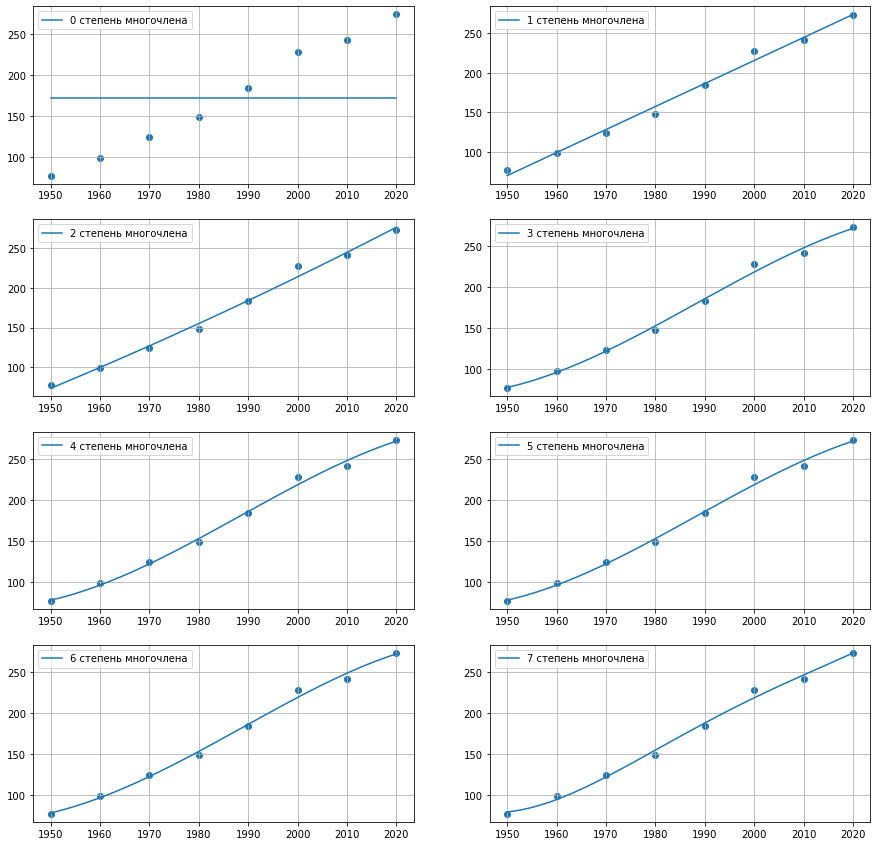

In [5]:
#Построим графики многочленов каждой степени, полученныx МНК
x_data = np.linspace(1950, 2020, 100)
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
k = 0
for i in range(4):
    for j in range(2):
        axs[i][j].plot(x_data, [PolValueAtPoint(pol[k], dot) for dot in x_data], label = f'{k} степень многочлена')
        axs[i][j].scatter(years,data)
        axs[i][j].legend()
        axs[i][j].grid()
        k += 1

In [6]:
print("Численность населения в 2019 году, найденная по методу наименьших квадратов:",PolValueAtPoint(pol[6],2019))
print("Численность населения в 2019 году, найденная в интернете:", 270.6)

Численность населения в 2019 году, найденная по методу наименьших квадратов: 269.96707934327424
Численность населения в 2019 году, найденная в интернете: 270.6


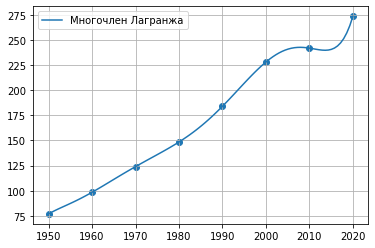

In [7]:
#Многочлен Лагранжа
def Lagrange(years, data, x):
    s = 0
    for i in range(len(years)):
        p = data[i]
        for j in range(len(years)):
            if i != j:
                p *= (x - years[j]) / (years[i] - years[j])
        s += p
    return s

x_data = np.linspace(1950, 2020, 100)
plt.plot(x_data, Lagrange(years, data, x_data), label = "Многочлен Лагранжа")
plt.scatter(years, data)
plt.legend()
plt.grid()

In [8]:
print("Численность населения в 2019 году, найденная по многочлену Лагранжа:", Lagrange(years, data, 2019))
print("Численность населения в 2019 году, найденная в интернете:", 270.6)

Численность населения в 2019 году, найденная по многочлену Лагранжа: 260.97670191712496
Численность населения в 2019 году, найденная в интернете: 270.6


**Вывод:** Мне удалось построить наилучший многочлен по МНК для численности населения Индонезии. По этому многочлену я вычислил численность населения в 2019 году - она получилась 269.967 млн. человек, что не сильно отличается от истинного значения в 270.6 млн. человек. Также я построил многочлен Лагранжа, используя те же данные. По нему у меня получилось значение 260.977 млн. человек, что уже достаточно сильно отличается от истинного значения населения в этом году.

## Задача 2
**Задание:** Дана функция $y = f(x)$. Приблизить функцию методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $\varepsilon$. Построить графики многочленов и графики погрешностей. Приблизить функцию методом интерполяции, указанным в индивидуальном варианте. Сравнить полученные результаты.  
$f(x) = {{6sin(x)}\over{x}}, [a, b] = [5, 15], \varepsilon = 0.001$  
Метод решения: линейный сплайн

1. Задать исходный отрезок $[a, b]$, и n - число отрезков разбиения (для начала n взять произвольно), функцию f(x).

In [9]:
def f(x):
    return 6 * np.sin(x) / x

a = 5
b = 15
eps = 0.001
n = 5

2. Составить таблицу значений функции в (n + 1) точке отркзка, то есть задать массивы x и y исходных данных.

In [10]:
x = np.linspace(a, b, n + 1)
y = f(x)

3. Составить подпрограмму, выполняющую вычисление функции в произвольной точке t отрезка $[a, b]$ с помощью интерполяционного многочлена Лагранжа $L(t)$ и указанного в в индивидуальном варианте многочлена P(t).

In [11]:
def L(x, y, t):
    s = 0
    for i in range(len(x)):
        p = y[i]
        for j in range(len(x)):
            if i != j:
                p *= (t - x[j]) / (x[i] - x[j])
        s += p
    return s

def P(x, y, x0):
    for i in range (len(x) - 1):
        if x0 >= x[i] and x0 <= x[i+1]:
            return y[i] + (y[i+1] - y[i]) * (x0 - x[i])/(x[i+1] - x[i])

4. Построить график функции погрешности $RP(t) = |f(t) - P(t)|$ и $RL(t)$ и по графику определить максимальную величину полученной погрешности приближения. Если точность не достигнута, то увеличить число узлов интерполяции. Найти значение n = N, при котором точность достигается.

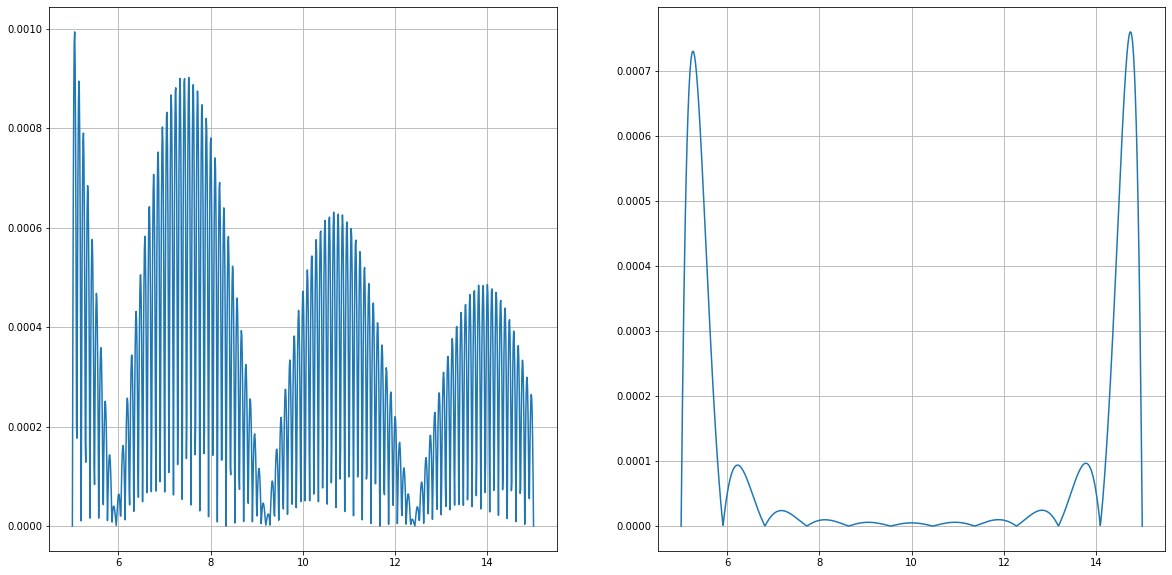

In [12]:
def RP(x, y, t):
    return np.abs(f(t) - P(x, y, t))

def RL(x, y, t):
    return np.abs(f(t) - L(x, y, t))

n_p = 105
x_p = np.linspace(a, b, n_p + 1)
y_p = f(x_p)

x_data_p = np.linspace(a, b, 1000)
y_data_p = np.zeros(len(x_data_p))
for i in range(len(x_data_p)):
    y_data_p[i] = RP(x_p, y_p, x_data_p[i])
    

n_l = 11
x_l = np.linspace(a, b, n_l + 1)
y_l = f(x_l)
x_data_l = np.linspace(a, b, 1000)

plt.figure(figsize = (20,10))
#линейный сплайн
plt.subplot(1, 2, 1)
plt.plot(x_data_p, y_data_p)
plt.grid()
#многочлен Лагранжа
plt.subplot(1, 2, 2)
plt.plot(x_data_l, RL(x_l, y_l, x_data_l), label = "Погрешность многочлена Лагранжа")
plt.grid()

5. На одном чертеже построить графики интерполирующих многочленов и исходной функции.

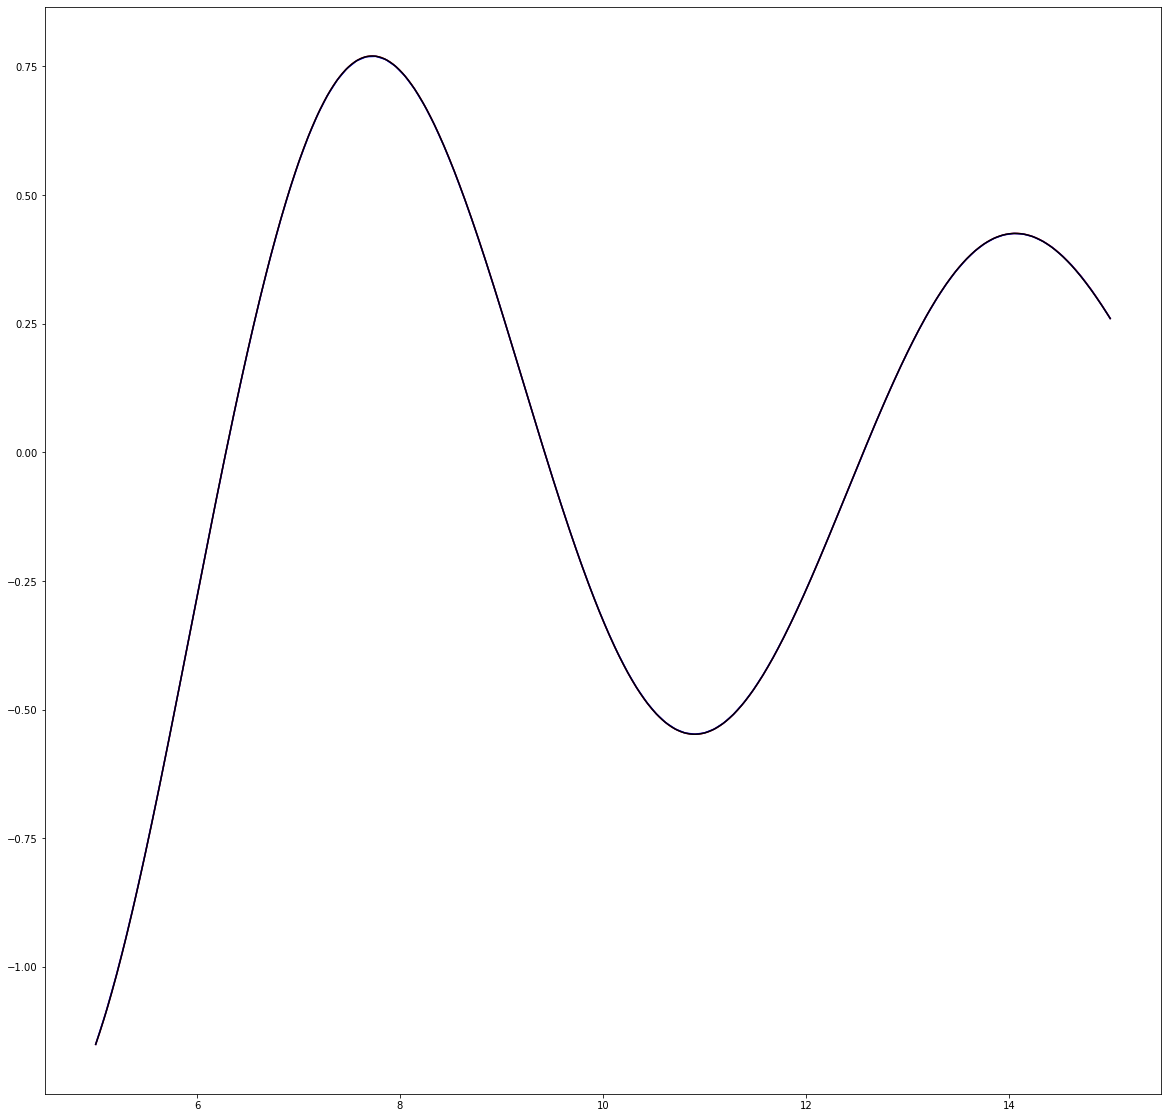

In [13]:
plt.figure(figsize = (20,20))
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, f(x_data), color = "Red")
for i in range(len(x_data_p)):
    y_data_p[i] = P(x_p, y_p, x_data_p[i])
plt.plot(x_data_p, y_data_p, color = "Blue")
plt.plot(x_data_l, L(x_l, y_l, x_data_l), color = "Black")

**Вывод:** Я построил многочлен Лагранжа и линейный сплайн для заданной функции f(x). Заданной точности дял многочлена Лагранжа удалось достичь при 11 отрезках разбиения, тогда как для линейного сплайна понадобилось уже 105 отрезков. Я думаю, что это связано с тем, что линейный сплайн плохо интерполирует заданную функцию.

## Задача 3
**Задание:** Задана функция $f(x)$, определенная на отрезке $[-1, 1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $\varepsilon$ и произвести экономизацию полученного степенного ряда.  
$f(x) = x^2(1 - cos(x))$

1. Определить функцию $S(x,c) = \sum_{k=0}^n c_k x^k$, вычисляющую частичную сумму ряда по коэффициентам {$c_k$}$_{k = 0}^n$.

In [14]:
def f(x):
    return (x**2) * (1 - np.cos(x))

def S(x, c):
    sum = 0
    p = x ** 4
    for i in range(len(c)):
        sum += c[i] * p
        p *= x * x
    return sum

2. Вычислить коэффициенты разложения и определить требуемое количество слагаемых для достижения требуемой точности, построив график.

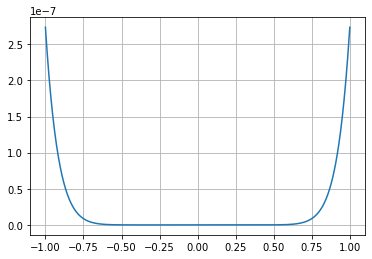

In [15]:
def c_n(n):
    c = np.zeros(n)
    k = 0
    for i in range(n):
        if i % 2 == 0:
            c[k] =  1 / np.math.factorial(2*i+2)
        else:
            c[k] = -1 / np.math.factorial(2*i+2)
        k += 1
    return c

def RS(x, c):
    return np.abs(S(x, c) - f(x))

n = 4
c = c_n(n)
x_data = np.linspace(-1, 1, 1000)
plt.plot(x_data, RS(x_data, c))
plt.grid()

Точность $\varepsilon = 10^{-6}$ достигается при 4 слагаемых ряда

3. Произвести экономизацию степенного ряда до тех пор, пока созраняется необходимая точность (см. приложение).

In [16]:
def T(x, n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2*x*T(x, n - 1) - T(x, n - 2)

def econ10(x):
    return (1280*(x**8) - 1120*(x**6) + 400*(x**4) - 50*(x**2) + 1) / 512

def econ8(x):
    return (256*(x**6) - 160*(x**4) + 32*(x**2) - 1) / 128

c2 = c_n(2)
c3 = c_n(3)
c4 = c_n(4)
x_data = np.linspace(-1, 1, 1000)
ec1 = S(x_data, c3) + c4[3] * econ10(x_data)
ec2 = S(x_data, c2) + c4[3] * econ10(x_data) + c4[2] * econ8(x_data)
print("Погрешность первой экономизации:")
print(np.amax(np.abs(f(x_data) - ec1)))
print("Погрешность второй экономизации:")
print(np.amax(np.abs(f(x_data) - ec2)))

Погрешность первой экономизации:
2.36028982303349e-07
Погрешность второй экономизации:
1.1075750783851035e-05


4. Построить график погрешности каждого этапа экономизации.

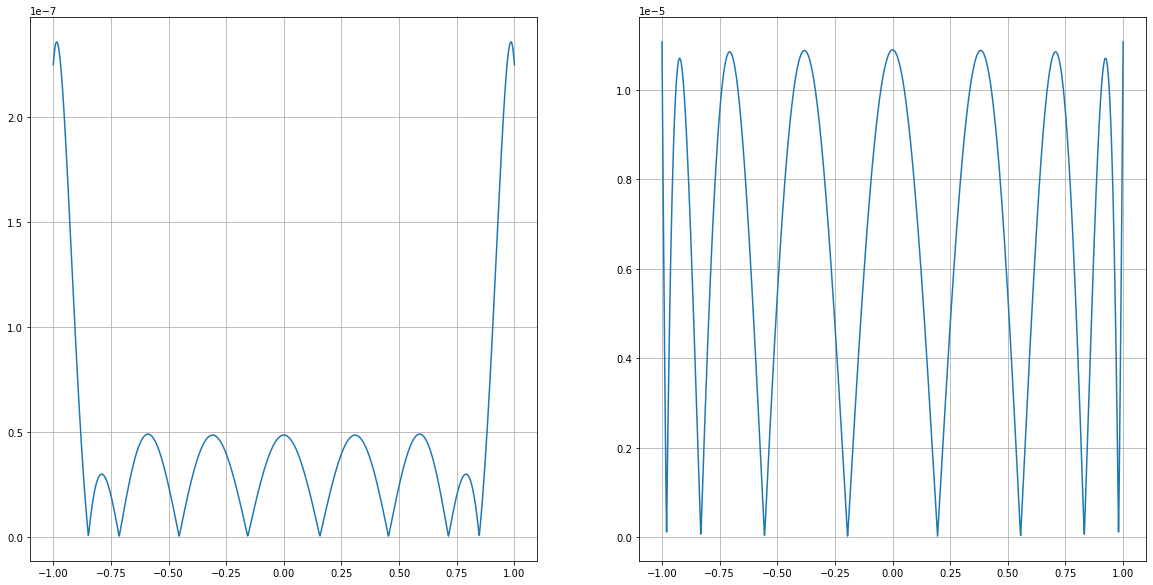

In [17]:
x_data = np.linspace(-1, 1, 1000)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.plot(x_data, np.abs(f(x_data) - ec1))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x_data, np.abs(f(x_data) - ec2))
plt.grid()

**Вывод:** Мне удалось построить ряд Тейлора для заданной функции f(x) и произвести экономизацию для данного ряда. У меня получилось, что после первой экономизации еще сохраняется точность $\varepsilon = 10^{-6}$, а после второй уже нет.